## STEP 1: Importing Necessery Libraries

In [39]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2: Importing DataSet

In [4]:
credit_card_data = pd.read_csv('creditcard.csv')

In [5]:
credit_card_data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
credit_card_data.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,-0.280302,-0.849919,0.300245,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.108846,-0.480820,-0.074513,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: ylabel='count'>

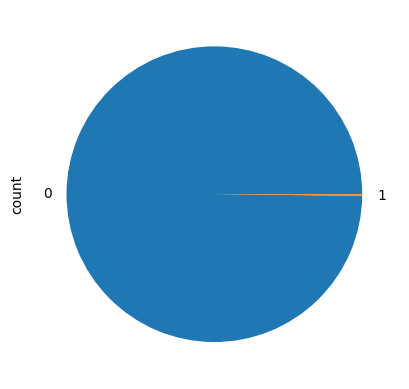

In [8]:
credit_card_data['Class'].value_counts().plot(kind='pie')

In [9]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## STEP 3: Checking for NULL Values and Cleaning it

In [10]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Therefore the dataset doesn't contain any NULL values

In [11]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## STEP 4 Analysing Legitimate and Fraudulent Card Data

### Histogram

C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

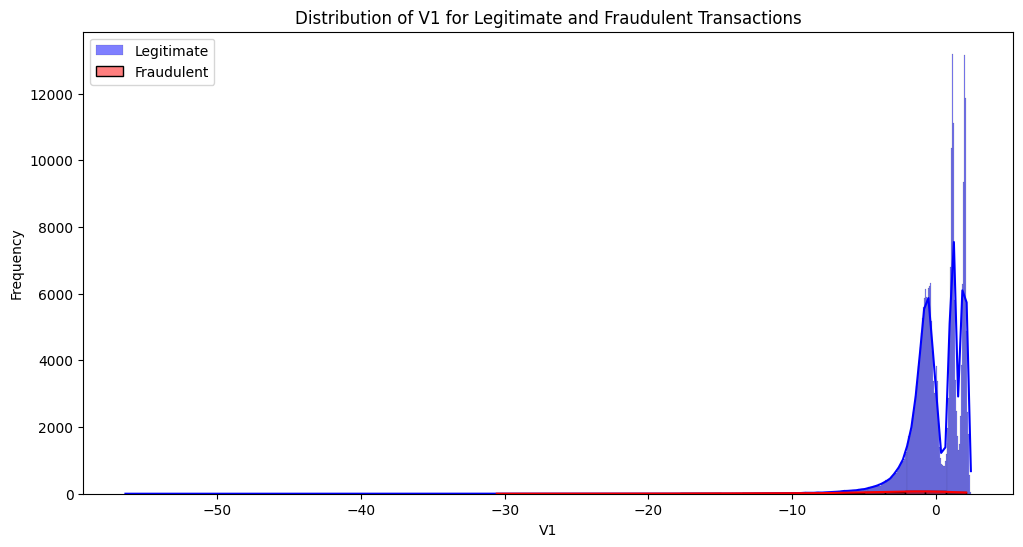

C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

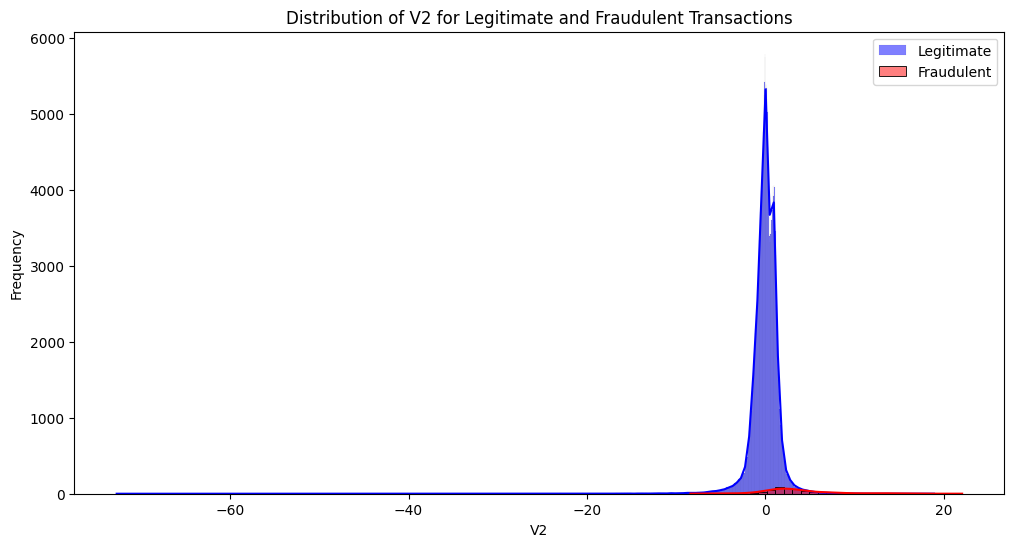

C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jerop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

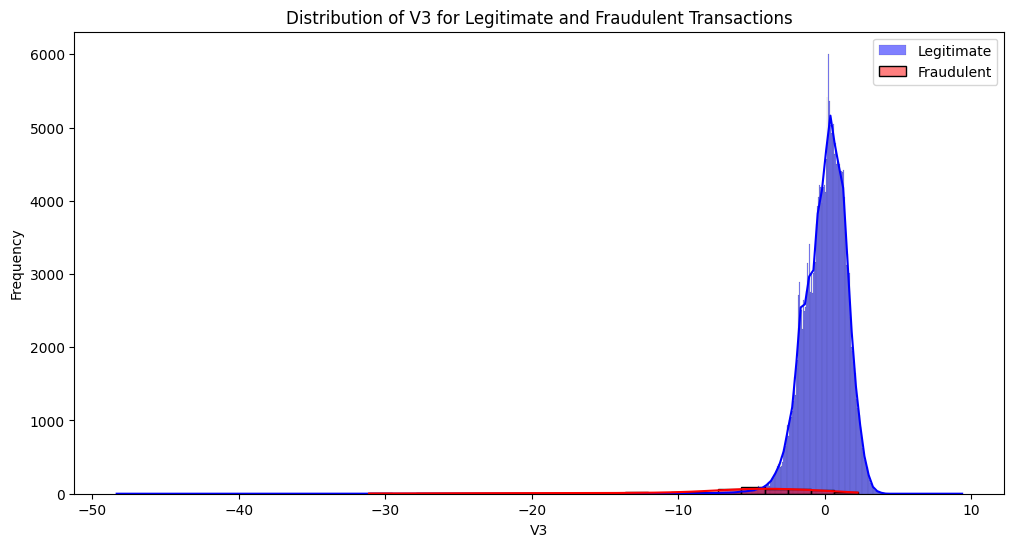

In [14]:
for feature in ["V1", "V2", "V3"]:
    plt.figure(figsize=(12, 6))
    sns.histplot(legit[feature], color='blue', kde=True, label='Legitimate')
    sns.histplot(fraud[feature], color='red', kde=True, label='Fraudulent')
    plt.title(f'Distribution of {feature} for Legitimate and Fraudulent Transactions')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### HeatMap

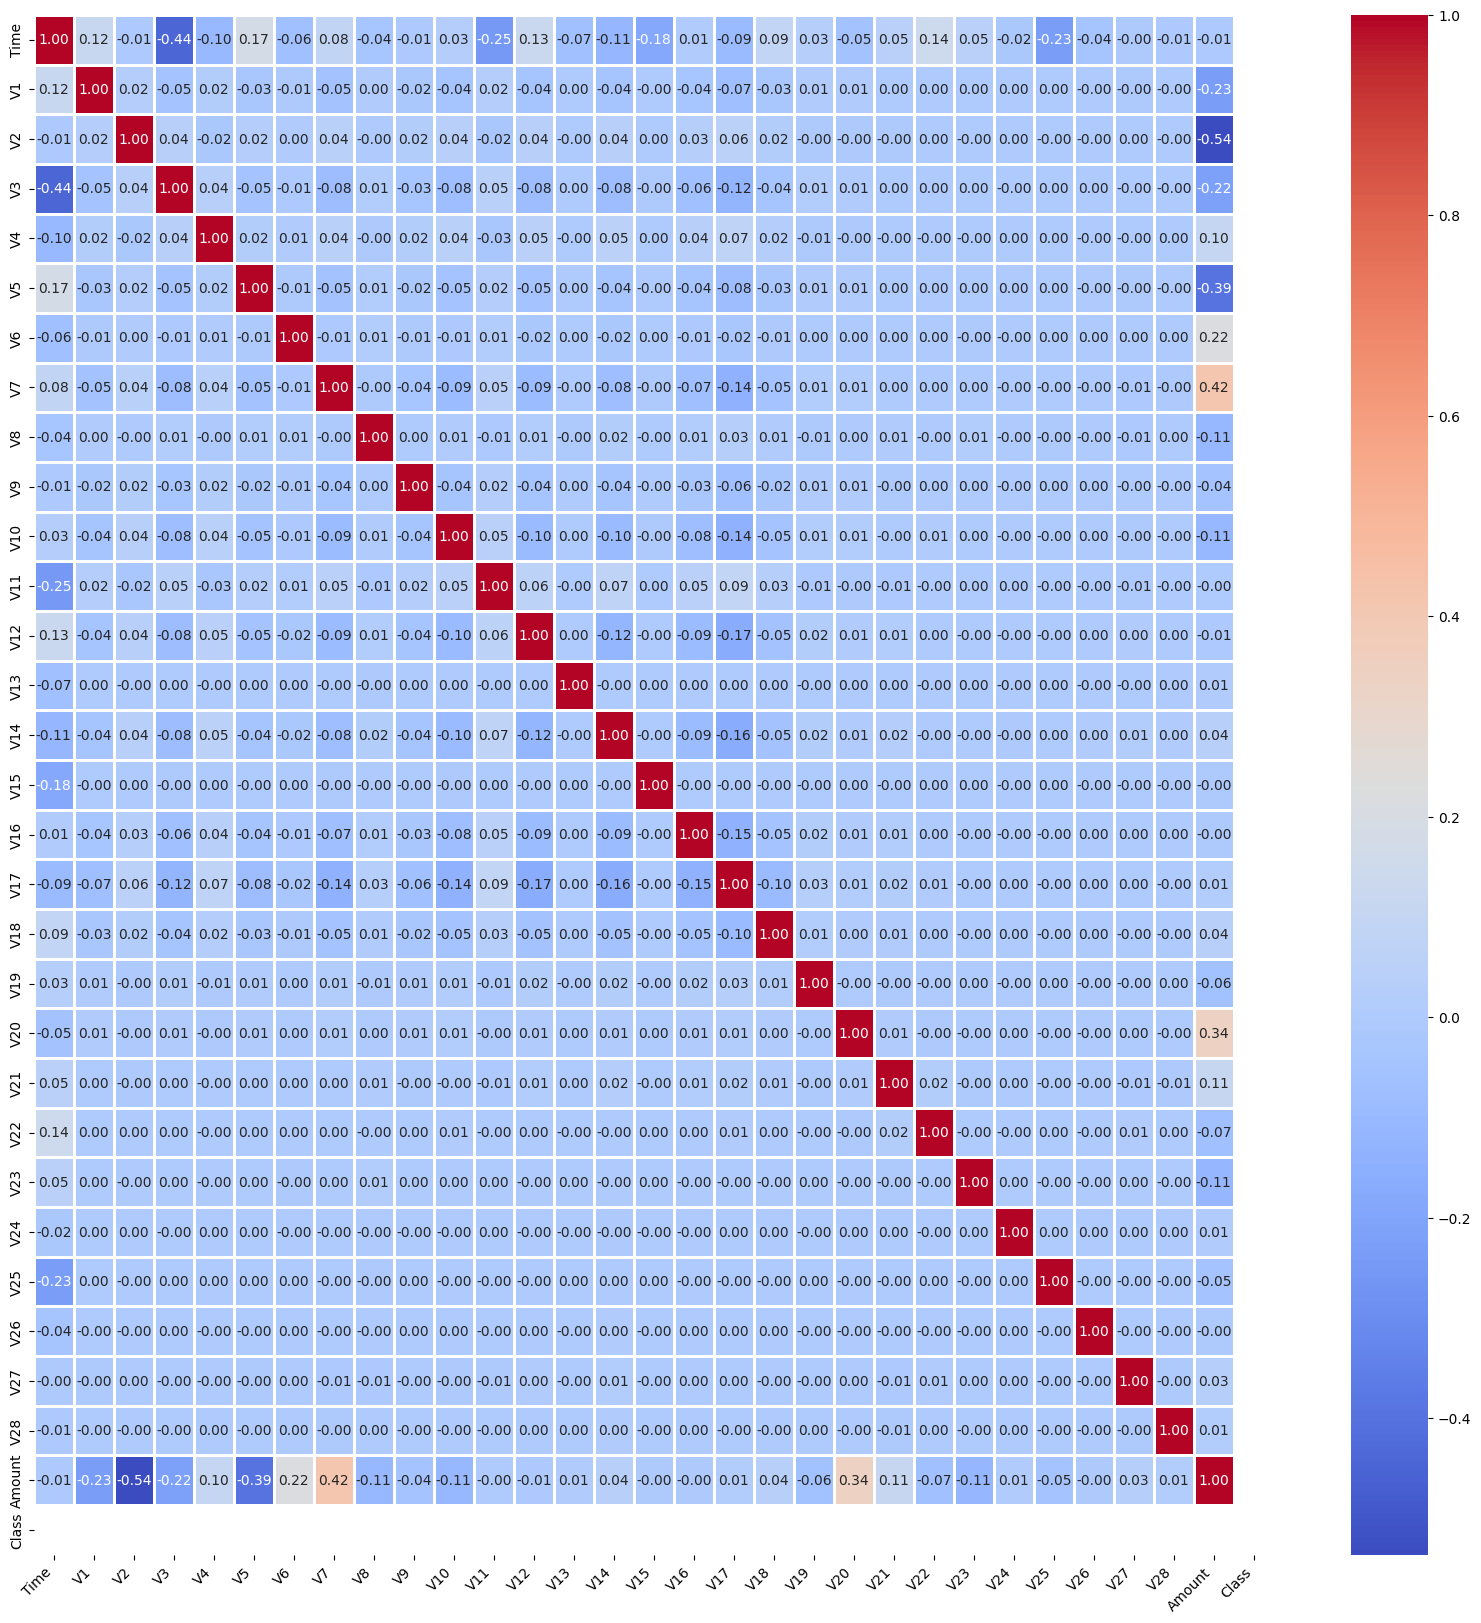

In [55]:
plt.figure(figsize=(20, 20))

dataplot = sns.heatmap(
    legit.corr(),
    annot=True,  
    cmap='coolwarm',  
    fmt='.2f', 
    linewidths=1, 
)

dataplot.set_xticklabels(dataplot.get_xticklabels(), rotation=45, ha='right')

plt.show()

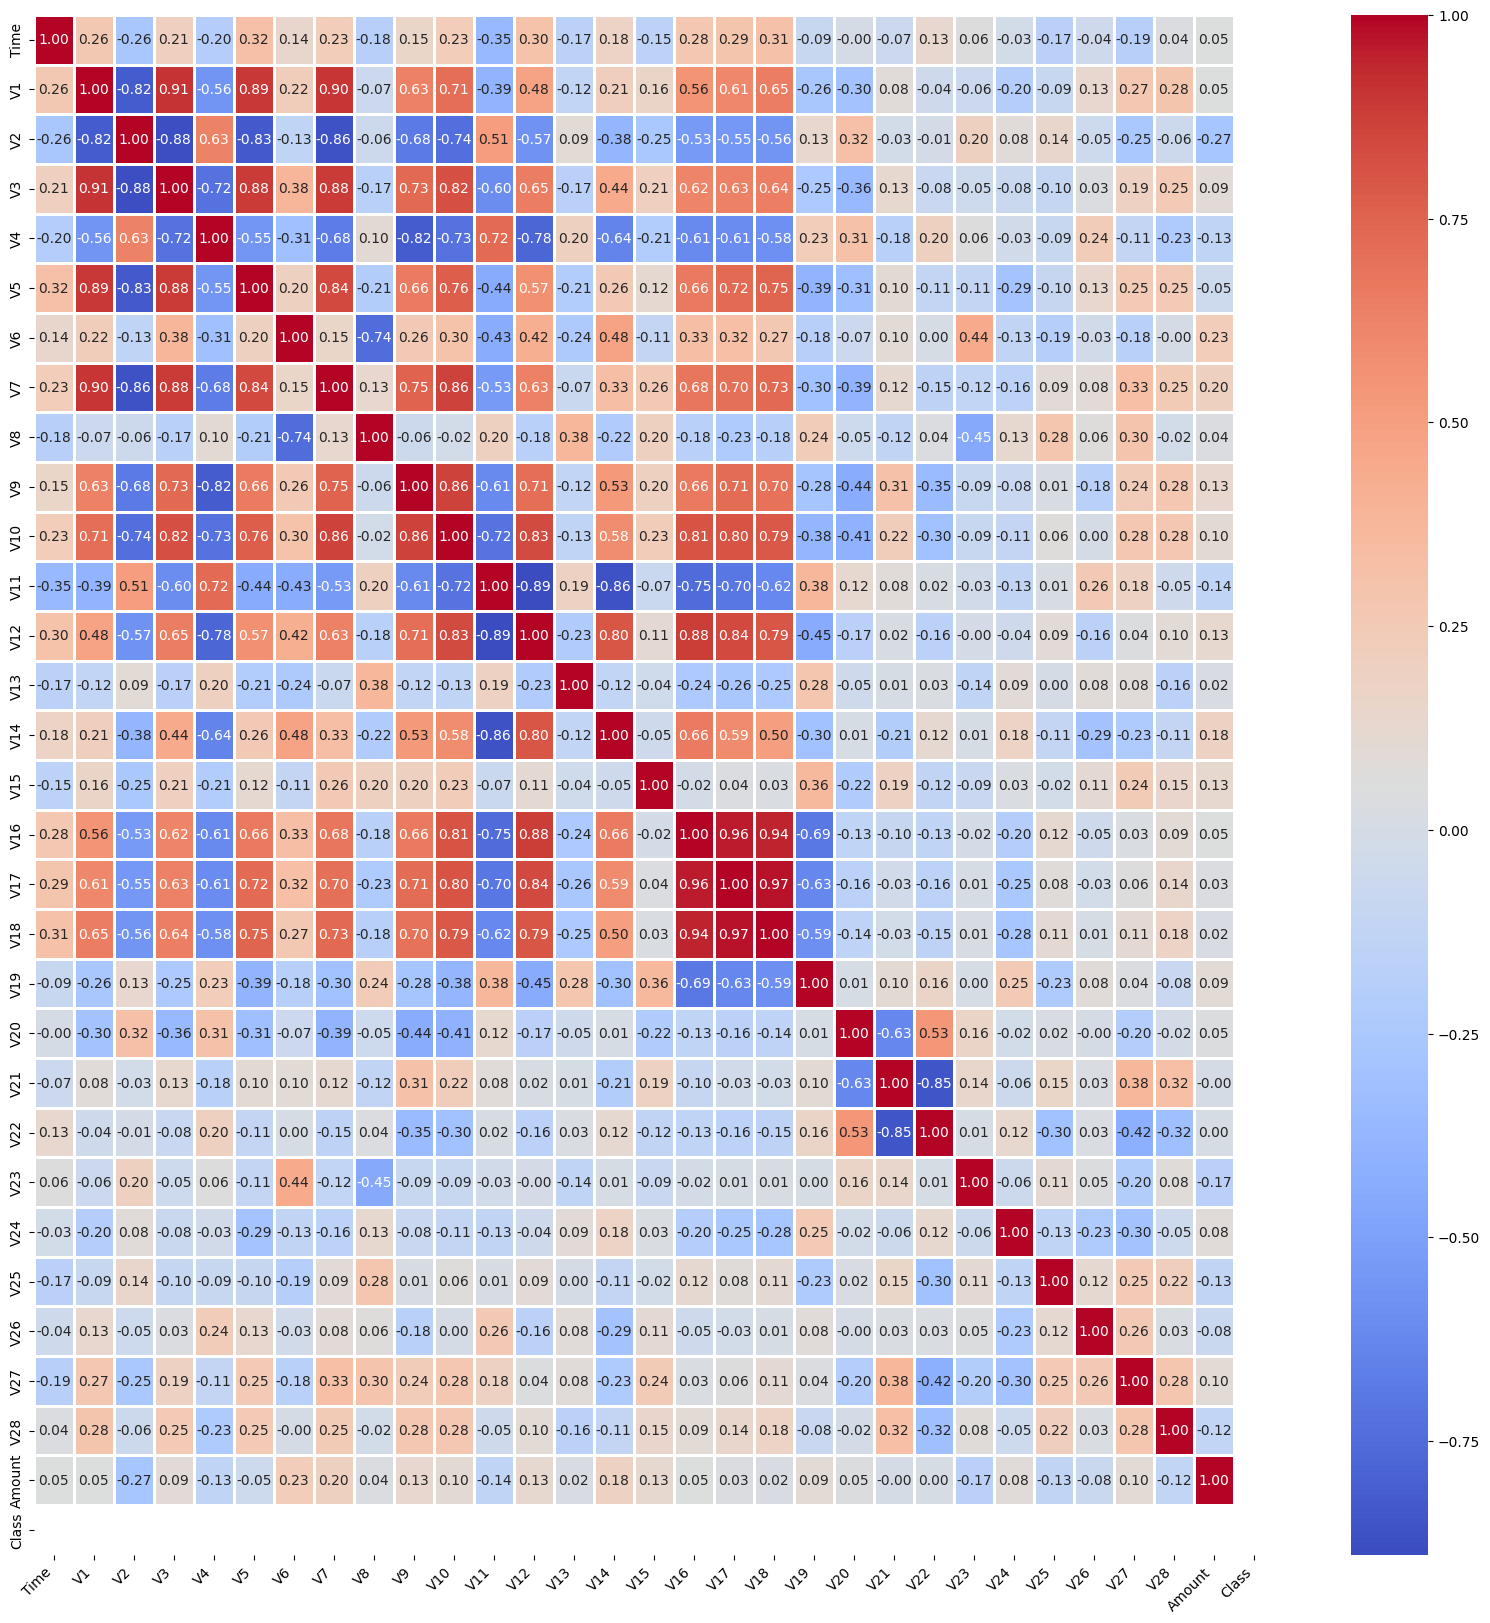

In [41]:
plt.figure(figsize=(20, 20))

dataplot = sns.heatmap(
    fraud.corr(),
    annot=True,  
    cmap='coolwarm',  
    fmt='.2f',  
    linewidths=1,  
)

dataplot.set_xticklabels(dataplot.get_xticklabels(), rotation=45, ha='right')

plt.show()

### Description of Legit and Fraud

In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## STEP 5: Grouping Classes In credit card data

In [17]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
legit_sample = legit.sample(n=492)

## STEP 6: Creating New DataSet by concatenating Sample legit and fraud

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3172,2746.0,-2.524746,-1.939601,2.477995,-0.908546,0.822557,-1.350240,-0.208071,0.193133,0.568720,...,0.081986,-0.488309,0.530262,0.431535,0.468437,0.691578,-0.173138,0.097896,192.88,0
1073,821.0,0.630628,-1.343565,0.795885,0.498127,-1.531827,-0.287977,-0.281653,-0.000244,1.232764,...,-0.056565,-0.605084,-0.179311,0.476460,0.011989,0.911464,-0.093208,0.065854,309.00,0
121537,76230.0,-1.425789,1.283936,1.088791,-0.322487,-0.012651,-0.390155,0.612860,-0.041248,0.041970,...,-0.257821,-0.556120,0.003476,-0.037763,-0.196380,-0.020625,-0.617100,-0.311687,17.99,0
199342,132915.0,2.077543,-0.037963,-1.382221,0.340266,-0.000675,-1.292898,0.236362,-0.378428,0.659218,...,0.233442,0.818371,-0.017169,-0.082377,0.274901,-0.100689,-0.022706,-0.060289,4.99,0
161135,113913.0,1.864616,0.242107,-0.183291,4.028989,-0.005995,0.453585,-0.307622,0.173418,-0.124106,...,0.094753,0.478547,0.179081,1.063898,0.024310,0.085026,-0.011115,-0.039143,1.51,0
76081,56387.0,1.075312,-1.930964,0.421900,-1.386975,-1.811762,0.194582,-1.340359,0.240003,-1.533356,...,0.084992,0.133026,-0.161575,-0.352805,0.140648,-0.083737,0.014968,0.038176,198.00,0
156987,109295.0,1.919974,0.093762,-1.629277,1.445621,0.623394,-0.585829,0.467494,-0.313358,1.326671,...,-0.048011,0.170287,-0.078336,-0.463510,0.412795,-0.528387,-0.058163,-0.074863,56.00,0
178081,123468.0,-0.692976,0.651410,1.185268,-1.226425,1.137281,-0.721435,1.278036,-0.291655,-0.124592,...,-0.390904,-1.096597,-0.410678,-0.695114,0.594951,0.253628,-0.240549,-0.193892,1.29,0
217530,140925.0,-0.450702,-0.495565,-0.492194,-2.380523,-4.714235,1.780638,2.697106,-0.571639,-1.783272,...,-0.548203,-0.401244,0.293429,1.095678,-0.852107,-0.646580,-0.044982,-0.546023,759.95,0
34045,37489.0,1.275414,-0.960398,0.789711,-0.838874,-1.294806,0.214432,-1.318933,0.346678,-0.351151,...,0.428075,1.057173,-0.118463,-0.303762,0.296819,-0.012615,0.033841,0.008053,29.95,0


In [21]:
new_dataset.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
261925,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
262560,160537.0,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,-3.541780,...,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,4.69,1
262826,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,...,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
263274,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1
268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1
272521,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1


In [22]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93943.487805,0.101464,-0.023629,-0.036696,-0.058043,-0.041217,-0.032015,0.110431,0.031460,0.048162,...,0.038770,-0.023689,-0.058152,-0.001730,-0.025002,-0.008992,0.016829,-0.019574,0.001292,104.871240
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## STEP 7: Preparing for Training and Testing

In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
45011    42168.0  1.293234  0.097565 -0.209304  0.329036  0.034958 -0.145507   
202890  134536.0 -0.153312  0.659263  1.290352 -0.115573 -0.311693 -0.506394   
197754  132163.0 -0.420970 -0.250781  0.014173 -2.455277  0.276551 -0.483339   
19592    30399.0  1.277469 -0.828540  0.973783 -0.718640 -1.519121 -0.403797   
118232   75003.0  1.152804 -0.334678  0.582439  0.085212 -0.711624 -0.100460   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

45011     0
202890    0
197754    0
19592     0
118232    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Axes(0.22375,0.11;0.5775x0.77)


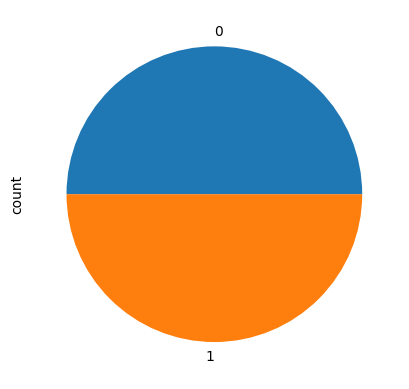

In [25]:
print(Y.value_counts().plot(kind='pie'))

## STEP 8: Training and Testing

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## STEP 9: Model Building

### Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

### Random Forest Classifier

In [48]:
rf=RandomForestClassifier(max_samples=0.9)

model_rf=rf.fit(X_train,Y_train)
accuracy=model_rf.score(X_test,Y_test)

In [49]:
preds = model_rf.predict(X_test)

## STEP 10: Model Evaluation

In [50]:
cv_scores = cross_val_score(model_rf, X_test, Y_test, cv=5, scoring='average_precision')

print("AUPRC scores for each fold:", cv_scores)

print("Mean AUPRC:", cv_scores.mean())

AUPRC scores for each fold: [1.         0.9952381  0.97503704 0.97439545 0.97335526]
Mean AUPRC: 0.9836051687025371


In [51]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491740787801779


In [52]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437
